# <center>Basic Data Visualization</center>

1.Here we use the matplotlib API and the .plot() method to create visualization from pandas dataframe.<br>
2.create different chart type for individual and series of data.<br>
3.Modify the chart element and formatting to tell a clear story with data.


### The plot method

You can visualize a dataframe by using the .plot() method

In [1]:
import pandas as pd
import numpy as np

In [2]:
transaction_df = pd.read_csv("transactions.csv",parse_dates=["date"])

In [3]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [4]:
transaction_df.head()

date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922

<Axes: xlabel='date'>

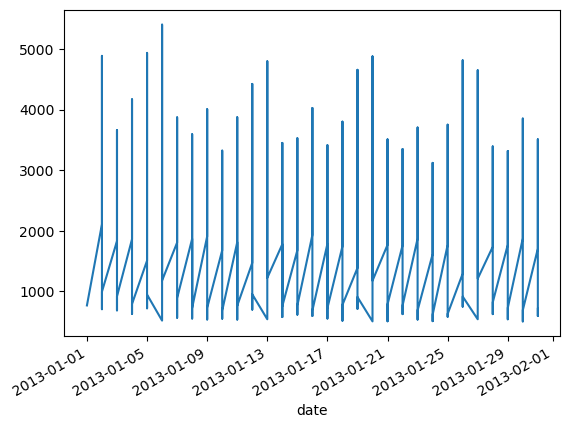

In [5]:
transaction_df.set_index("date").loc["2013-01","transactions"].plot()

<Axes: xlabel='date'>

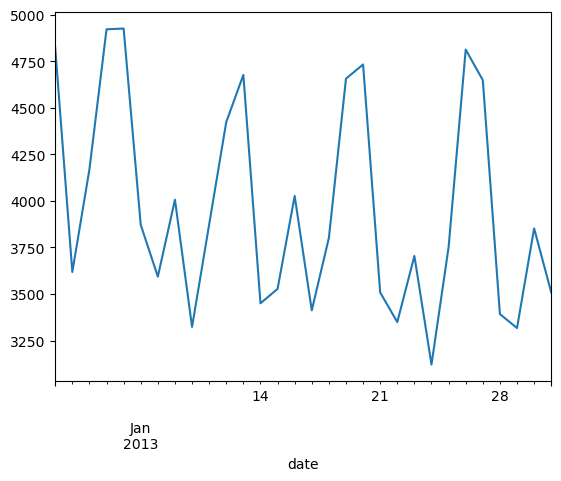

In [6]:
#to get clear understanding of transaction we filter out the store 44

transaction_df.query("store_nbr ==44").set_index("date").loc["2013-01","transactions"].plot()

In [7]:
df_44 = transaction_df.loc[transaction_df["store_nbr"] == 44,["date","transactions"]]

In [8]:
df_44

date  transactions
38    2013-01-02          4821
84    2013-01-03          3618
130   2013-01-04          4169
176   2013-01-05          4921
222   2013-01-06          4925
...          ...           ...
83261 2017-08-11          4418
83315 2017-08-12          4277
83369 2017-08-13          4392
83423 2017-08-14          4039
83477 2017-08-15          3815

[1677 rows x 2 columns]

<Axes: xlabel='date'>

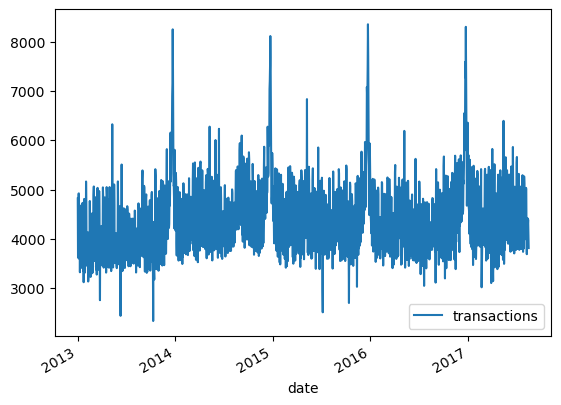

In [9]:
df_44.set_index("date").plot()

<Axes: xlabel='date'>

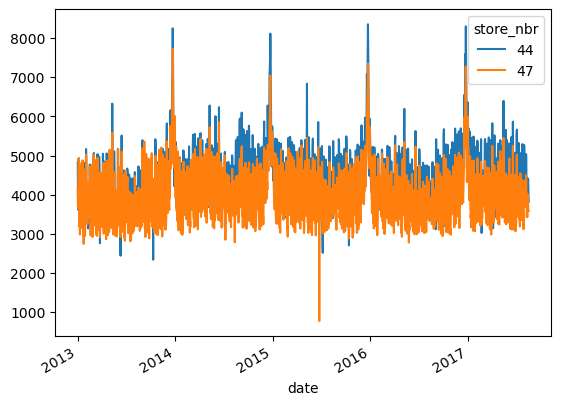

In [10]:
(transaction_df
.query("store_nbr in [44,47]")
.pivot_table(index="date",columns="store_nbr")
.droplevel(0,axis=1)
.plot())

### Chart formatting

In [11]:
df_44.head()

date  transactions
38  2013-01-02          4821
84  2013-01-03          3618
130 2013-01-04          4169
176 2013-01-05          4921
222 2013-01-06          4925

<Axes: title={'center': 'store 44 transaction'}, xlabel='date', ylabel='daily transactions'>

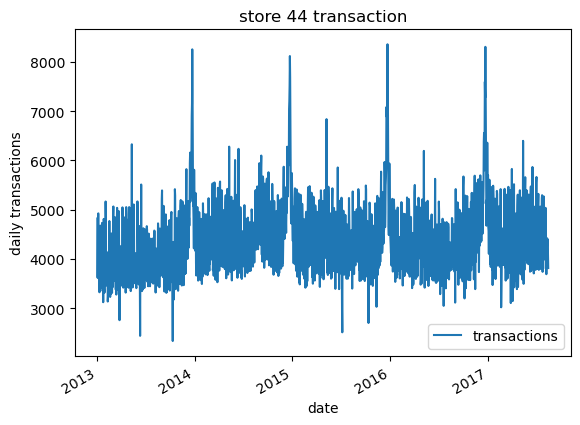

In [12]:
df_44.set_index("date").plot(title ="store 44 transaction",
                            xlabel ="date",ylabel="daily transactions")

<Axes: title={'center': 'store 44 transaction'}, xlabel='date', ylabel='daily transactions'>

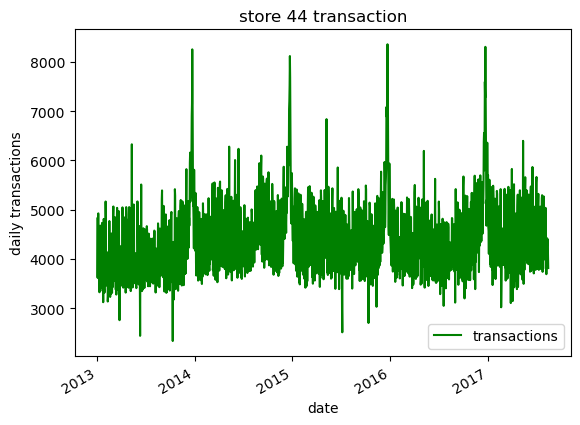

In [13]:
# we can modify the series colors

df_44.set_index("date").plot(title ="store 44 transaction",
                            xlabel ="date",ylabel="daily transactions",color='green')

<Axes: xlabel='date'>

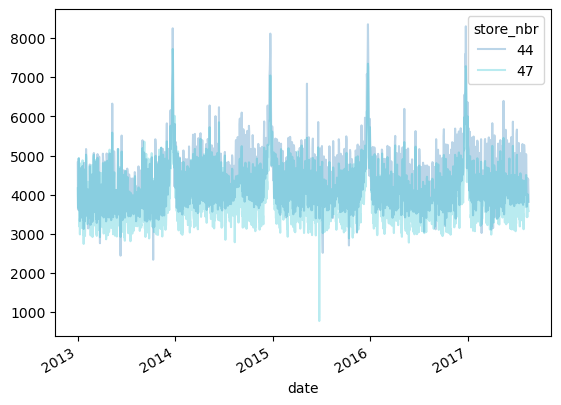

In [14]:
(transaction_df
.query("store_nbr in [44,47]")
.pivot_table(index="date",columns="store_nbr")
.droplevel(0,axis=1)
.plot(#color=["green","blue"],
cmap='tab10',
alpha=.3))#we can specify the color in a list

In [15]:
sales_df =pd.read_csv("retail_2016_2017.csv",parse_dates=["date"])

In [16]:
sales_df

id       date  store_nbr                      family     sales  \
0        1945944 2016-01-01          1                  AUTOMOTIVE     0.000   
1        1945945 2016-01-01          1                   BABY CARE     0.000   
2        1945946 2016-01-01          1                      BEAUTY     0.000   
3        1945947 2016-01-01          1                   BEVERAGES     0.000   
4        1945948 2016-01-01          1                       BOOKS     0.000   
...          ...        ...        ...                         ...       ...   
1054939  3000883 2017-08-15          9                     POULTRY   438.133   
1054940  3000884 2017-08-15          9              PREPARED FOODS   154.553   
1054941  3000885 2017-08-15          9                     PRODUCE  2419.729   
1054942  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
1054943  3000887 2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
1054939            0  
1054940            1  
1054941          148  
1054942            8  
1054943            0  

[1054944 rows x 6 columns]

In [17]:
sales_babycare  = sales_df.loc[sales_df["family"] =="BABY CARE",["date","sales"]]

In [18]:
sales_babycare

date  sales
1       2016-01-01    0.0
34      2016-01-01    0.0
67      2016-01-01    0.0
100     2016-01-01    0.0
133     2016-01-01    0.0
...            ...    ...
1054780 2017-08-15    0.0
1054813 2017-08-15    0.0
1054846 2017-08-15    0.0
1054879 2017-08-15    1.0
1054912 2017-08-15    0.0

[31968 rows x 2 columns]

<Axes: xlabel='date'>

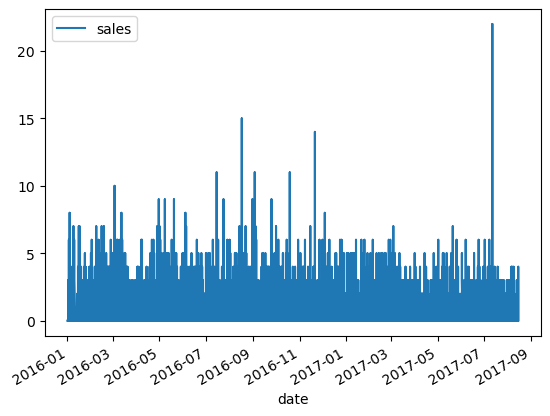

In [19]:
sales_babycare.set_index("date").plot()

<Axes: title={'center': 'Baby care sale'}, xlabel='date', ylabel='sales'>

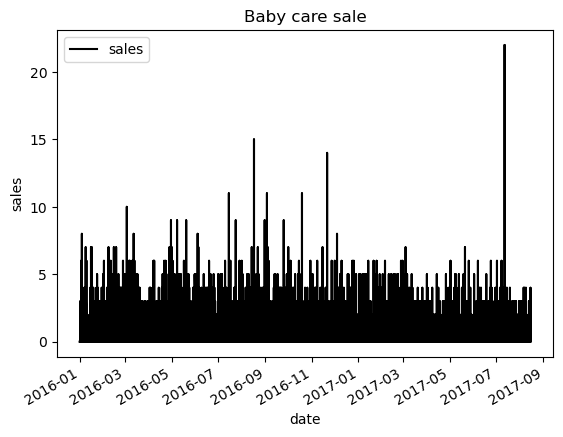

In [20]:
sales_babycare.set_index("date").plot(title ="Baby care sale",xlabel ="date",ylabel ="sales",color ="black")

In [21]:
auto_baby = sales_df[(sales_df["family"]=="BABY CARE") |(sales_df["family"] == "AUTOMOTIVE")]

In [22]:
auto_baby

id       date  store_nbr      family  sales  onpromotion
0        1945944 2016-01-01          1  AUTOMOTIVE    0.0            0
1        1945945 2016-01-01          1   BABY CARE    0.0            0
33       1945977 2016-01-01         10  AUTOMOTIVE    0.0            0
34       1945978 2016-01-01         10   BABY CARE    0.0            0
66       1946010 2016-01-01         11  AUTOMOTIVE    0.0            0
...          ...        ...        ...         ...    ...          ...
1054846  3000790 2017-08-15          7   BABY CARE    0.0            0
1054878  3000822 2017-08-15          8  AUTOMOTIVE    4.0            0
1054879  3000823 2017-08-15          8   BABY CARE    1.0            0
1054911  3000855 2017-08-15          9  AUTOMOTIVE   15.0            0
1054912  3000856 2017-08-15          9   BABY CARE    0.0            0

[63936 rows x 6 columns]

In [23]:
sales_auto_baby = auto_baby.loc[:,["date","family","sales"]]

In [24]:
baby_auto_pivot = sales_auto_baby.pivot_table(index ="date",columns ="family",values= "sales")

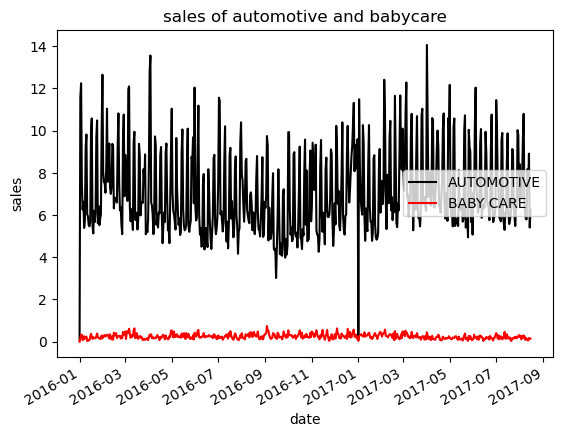

In [25]:
baby_auto_pivot.plot(title ="sales of automotive and babycare",xlabel ="date",ylabel ="sales",
                     color =["black",'red']).legend (loc="right")

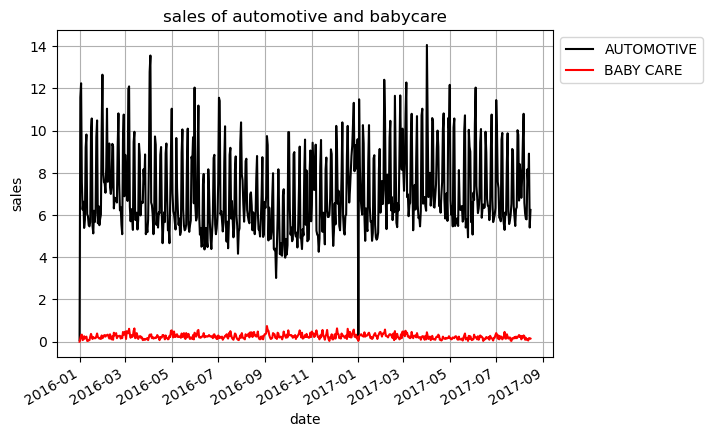

In [26]:
#legend
baby_auto_pivot.plot(title ="sales of automotive and babycare",xlabel ="date",ylabel ="sales",
                     color =["black",'red'],grid=True).legend(bbox_to_anchor=(1,1))

Matplotlib and seaborn have premade style templates that can be applied to charts,Once the style is set it can ve automatically apply to all charts

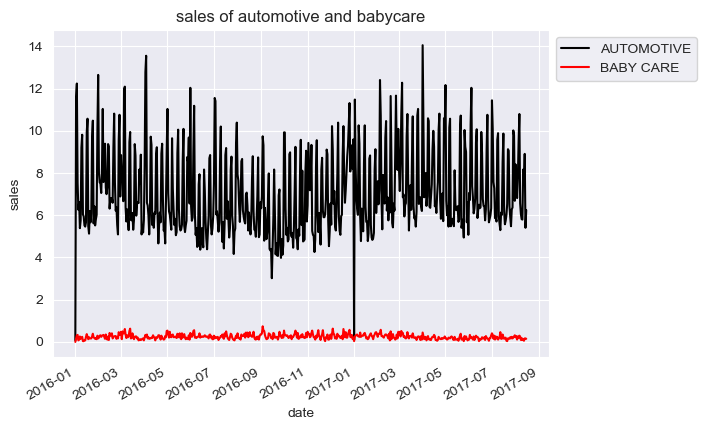

In [27]:
import seaborn as sns
sns.set_style("darkgrid")
#legend
baby_auto_pivot.plot(title ="sales of automotive and babycare",xlabel ="date",ylabel ="sales",
                     color =["black",'red'],grid=True).legend(bbox_to_anchor=(1,1))

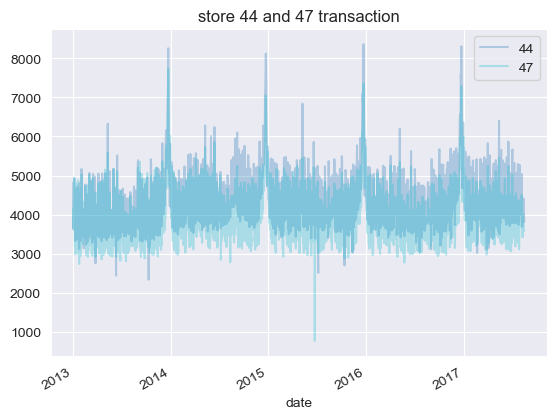

In [28]:
(transaction_df
.query("store_nbr in [44,47]")
.pivot_table(index="date",columns="store_nbr")
.droplevel(0,axis=1)
.plot(#color=["green","blue"],
cmap='tab10',
alpha=.3,title="store 44 and 47 transaction").legend(bbox_to_anchor=(1,1)))#we can specify the color in a list

array([[<Axes: title={'center': 'store 44'}, xlabel='date'>,
        <Axes: title={'center': 'store 47'}, xlabel='date'>]],
      dtype=object)

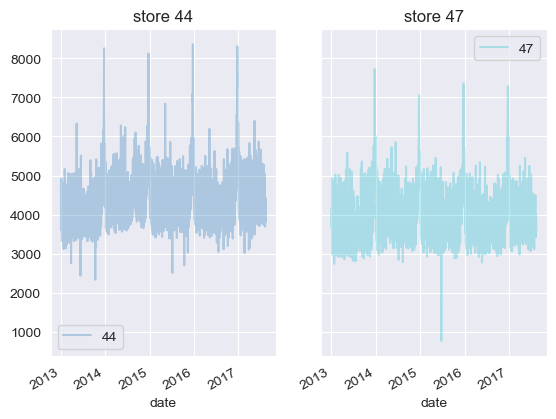

In [29]:
#create a subplot

(transaction_df
.query("store_nbr in [44,47]")
.pivot_table(index="date",columns="store_nbr")
.droplevel(0,axis=1)
.plot(#color=["green","blue"],#we can specify the color in a list
cmap='tab10',
alpha=.3,
subplots=True, #specify the subplot here
layout = (1,2),
sharey=True,  #share the y value for both plots
title =['store 44','store 47']))

In [30]:
transaction_df.head()

date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922

<Axes: title={'center': 'transaction by store'}, xlabel='store_nbr'>

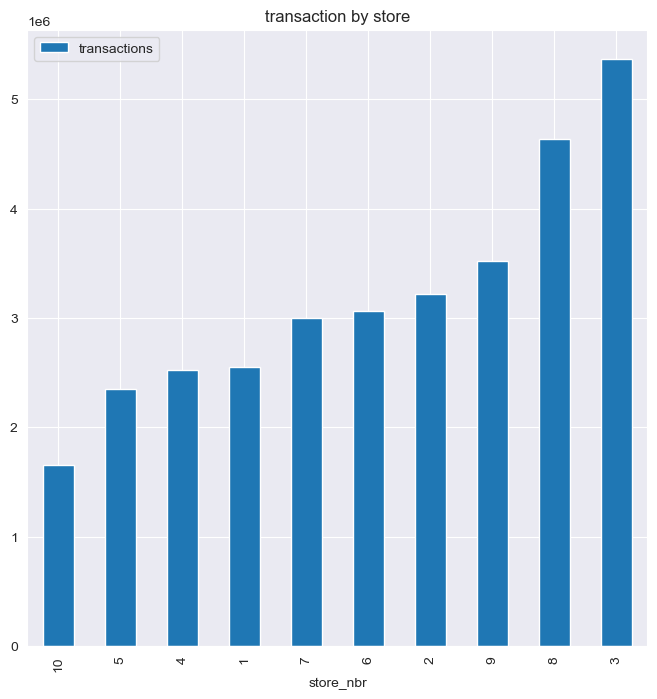

In [31]:
#bar chart

(transaction_df.query("store_nbr in [1,2,3,4,5,6,7,8,9,10]").groupby(["store_nbr"]).agg({"transactions":"sum"}).
 sort_values(by="transactions").
 plot.bar(title ="transaction by store",figsize =(8,8)))

<Axes: title={'center': 'transaction by store'}, ylabel='store_nbr'>

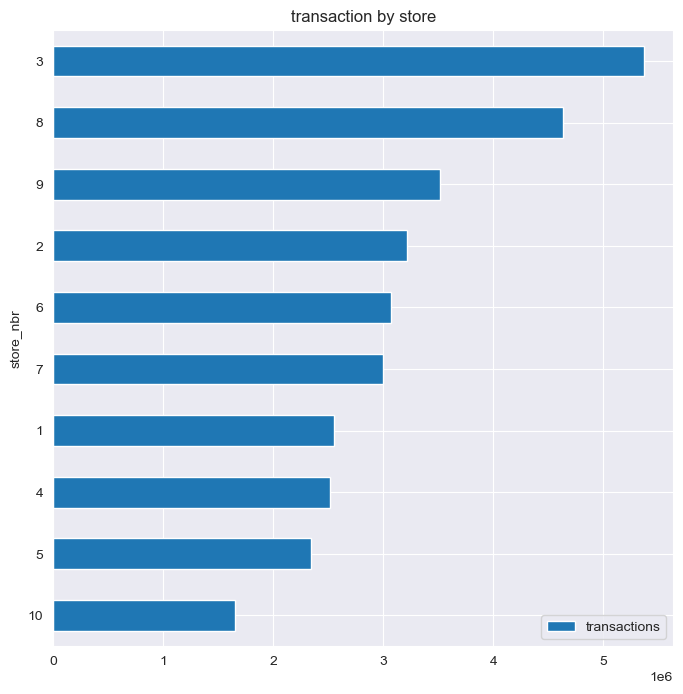

In [32]:
(transaction_df.query("store_nbr in [1,2,3,4,5,6,7,8,9,10]").groupby(["store_nbr"]).agg({"transactions":"sum"}).
 sort_values(by="transactions").
 plot.barh(title ="transaction by store",figsize =(8,8)))

In [35]:
store_3040 =list(range(30,41))

In [36]:
store_3040

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]

<Axes: title={'center': 'transaction by store 30 to 40'}, xlabel='store_nbr'>

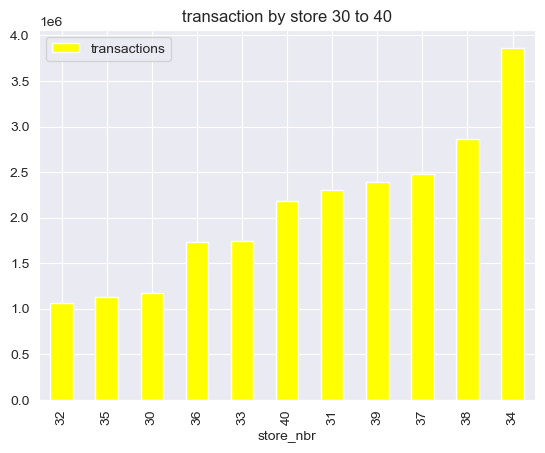

In [43]:
(transaction_df.query("store_nbr in @store_3040").groupby("store_nbr").
 agg({"transactions":"sum"}).sort_values(by="transactions").plot.bar(title ="transaction by store 30 to 40",color ="yellow"))

In [44]:
#stacked bar chart

(transaction_df.query("store_nbr in @store_3040 and date.dt.month in [1,2,3]").
 pivot_table(index=transaction_df["date"].dt.month,columns =transaction_df["store_nbr"],values="transactions",aggfunc="sum"))

store_nbr      30      31      32      33      34      35      36      37  \
date                                                                        
1          104677  198640   91403  152561  335677   96297  127152  222196   
2          101613  191606   93116  144437  333862  104096  130453  206380   
3          109245  211459  101488  161058  367965  113113  145059  226349   

store_nbr      38      39      40  
date                               
1          252013  206066  185490  
2          238059  200303  179215  
3          263250  218717  199810

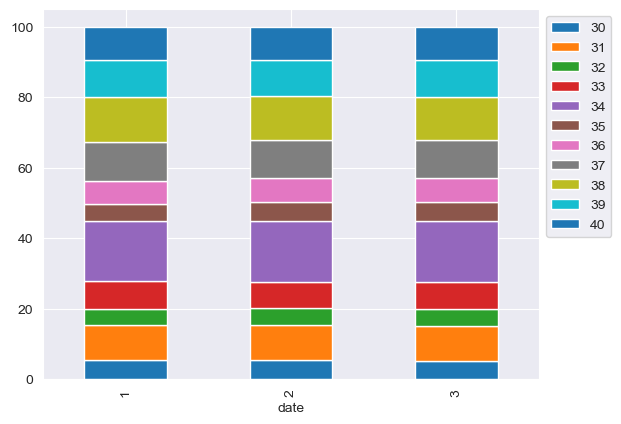

In [45]:
(transaction_df.query("store_nbr in @store_3040 and date.dt.month in [1,2,3]").
 pivot_table(index=transaction_df["date"].dt.month,columns =transaction_df["store_nbr"],values="transactions",aggfunc="sum").
apply(lambda x :x*100 /sum(x),axis =1).plot.bar(stacked=True).legend(bbox_to_anchor=(1,1)))

In [46]:
#pie chart is used for showing composition with categorical data
transaction_df.head()

date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922

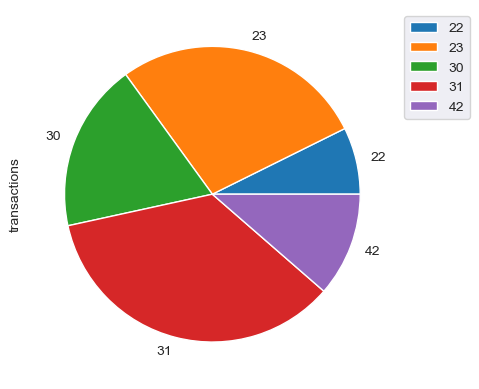

In [52]:
(transaction_df.query("store_nbr in [30,31,42,23,22] and date.dt.month in [1,2,3]").
 groupby("store_nbr").
 agg({"transactions":"sum"}).plot.pie(y="transactions")
).legend(bbox_to_anchor =(1,1))

<Axes: xlabel='30', ylabel='34'>

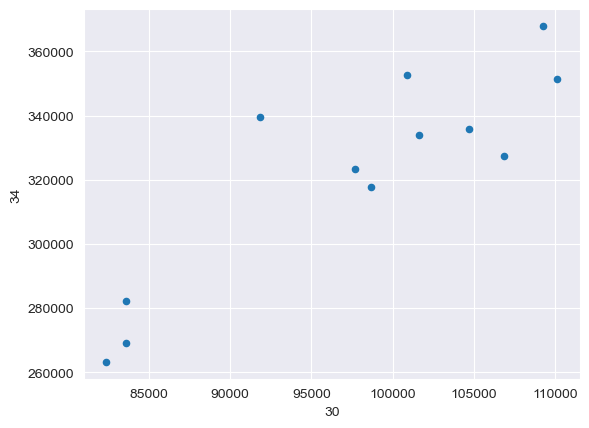

In [57]:
(transaction_df.query("store_nbr in @store_3040").
 pivot_table(index=transaction_df["date"].dt.month,
            columns ="store_nbr",values="transactions",aggfunc="sum").
plot.scatter(x=30,y=34))

<Axes: ylabel='Frequency'>

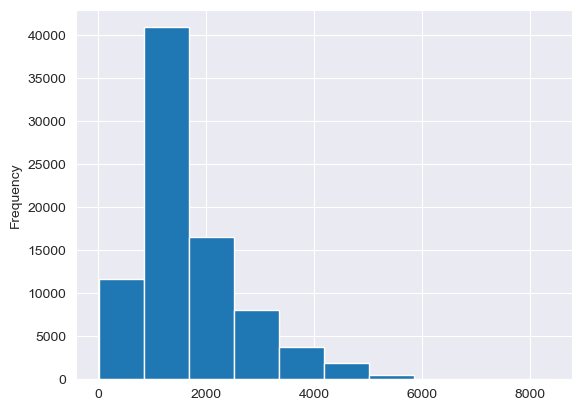

In [59]:
#Histogram are used for showing the distribution of numerical series

transaction_df.loc[:,"transactions"].plot.hist()

<Axes: ylabel='Frequency'>

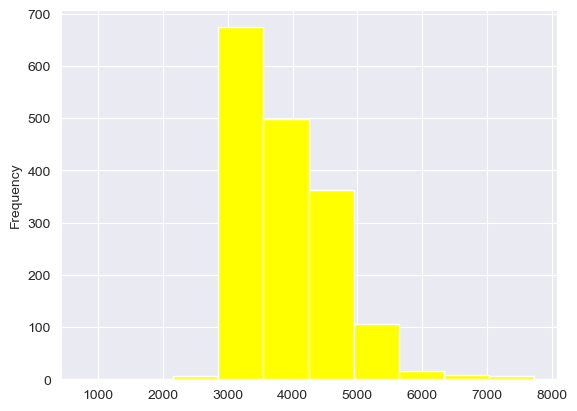

In [62]:
(transaction_df.loc[transaction_df["store_nbr"]==47,"transactions"].
plot.hist(color="yellow"))

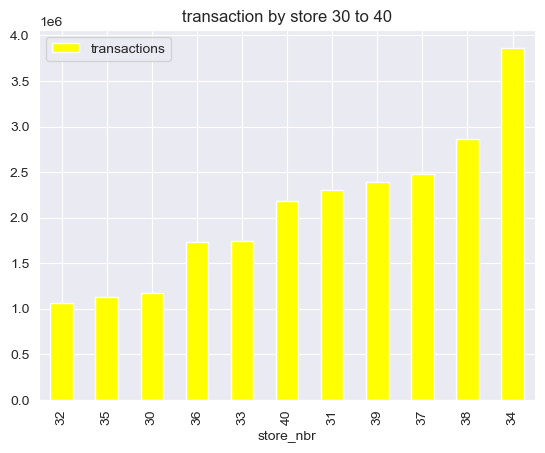

In [66]:
#to save the chart use .figure.savefig()

bar_chart =(transaction_df.query("store_nbr in @store_3040").groupby("store_nbr").
 agg({"transactions":"sum"}).sort_values(by="transactions").plot.bar(title ="transaction by store 30 to 40",color ="yellow"))

In [65]:
bar_chart.figure.savefig("transaction by store 30 to 40",bbox_inches="tight")

### Note:
<span style="color:purple">1.The **.plot()** method let you visualize the data in a dataframe.<br>
2.Use .plot() arguments to modify the **chart formatting**.</br>
3.Consider the **chart purpose** before plotting to communicate effectively.</span>